# Life Expectancy Analysis

![Graphic of life expectancy](images/healthcare-costs-in-retirement.jpg)

## Overview
This report leverages data from the World Health Organization (WHO) to tackle significant global health challenges, particularly in enhancing health and wellness outcomes in Africa and Asia. Our aim is to utilize data-driven insights to reduce child mortality rates and increase life expectancy. This analysis reveals trends in under-five child mortality rates as well as life expectancy and explores different factors like health expenditure, vaccination rates, and schooling can affect them. Policy makers and other decision makers in healthcare and government can use our findings and reccomendations to adjust budgets and policies to increase life expectancy across all continents.

## Business Problem
We are leveraging data from the World Health Organization (WHO) to address critical challenges in global health, particularly improving health and wellness outcomes in countries across Africa and Asia. At this policy advisory meeting, we aim to explore how data-driven insights can be used to reduce child mortality rates and increase life expectancy. By analyzing trends in health indicators, disease prevalence, and access to healthcare, our objective is to provide policymakers with actionable strategies to enhance healthcare systems, inform decisions, and shape effective, evidence-based policies that will improve lives and promote long-term wellness.

## Data Understanding
The dataset we are working with includes comprehensive health statistics reported by 193 countries between 2000 and 2015, published by the World Health Organization (WHO). To enhance the analysis, we have merged it with economic data from the United Nations. Key variables in this dataset include GDP (Gross Domestic Product), years of schooling, and health expenditure as a percentage of GDP per capita. These variables are crucial for understanding the broader socio-economic context that influences health outcomes, helping us analyze how economic factors and investments in education and healthcare impact child mortality and life expectancy.

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
df = pd.read_csv('data/Life Expectancy Data.csv')
df.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [118]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [119]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [120]:
df.describe(include="object")

,Country,Status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


In [121]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

### Life Expectancy Data
The dataset contains 2,938 entries, providing life expectancy data and related factors for various countries from 2000 to 2015. While most columns consist of numerical values, the `Country` and `Status` columns are categorical. Several columns, such as `Adult Mortality`, `Hepatitis B`, `GDP`, and `Schooling`, have missing values that will need to be addressed before analysis. Additionally, certain columns, like `under-five death`, show a highly skewed mean, indicating the presence of outliers that may require further investigation.

## Data Preparation
We wanted to create a new dataframe called `df_relevant` that consisted of only the columns we wanted to explore further. However, we first had to strip the column names for whitespace to simplify the data manipulation process.

In [122]:
# Getting the relevant columns we want to use for our findings
relevant_cols = [
    'Country',
    'Year',
    'Status',
    'Hepatitis B',
    "Polio",
    'Diphtheria',
    'under-five deaths',
    'percentage expenditure',
    'GDP',
    'Schooling',
    'Population',
    "Life expectancy"
]

In [123]:
df.columns 

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [124]:
# stripping column names without whitespace
df = df.rename(columns={'Life expectancy ':'Life expectancy', 'under-five deaths ':'under-five deaths','Diphtheria ':'Diphtheria'})
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths', 'Polio', 'Total expenditure',
       'Diphtheria', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [125]:
# now we can create a new df called df_relevant with relevant cols
df_relevant = df[relevant_cols]
df_relevant.head()

,Country,Year,Status,Hepatitis B,Polio,Diphtheria,under-five deaths,percentage expenditure,GDP,Schooling,Population,Life expectancy
0,Afghanistan,2015,Developing,65.0,6.0,65.0,83,71.279624,584.259210,10.1,33736494.0,65.0
1,Afghanistan,2014,Developing,62.0,58.0,62.0,86,73.523582,612.696514,10.0,327582.0,59.9
2,Afghanistan,2013,Developing,64.0,62.0,64.0,89,73.219243,631.744976,9.9,31731688.0,59.9
3,Afghanistan,2012,Developing,67.0,67.0,67.0,93,78.184215,669.959000,9.8,3696958.0,59.5
4,Afghanistan,2011,Developing,68.0,68.0,68.0,97,7.097109,63.537231,9.5,2978599.0,59.2


In [126]:
df_relevant.describe()

,Year,Hepatitis B,Polio,Diphtheria,under-five deaths,percentage expenditure,GDP,Schooling,Population,Life expectancy
count,2938.000000,2385.000000,2919.000000,2919.000000,2938.000000,2938.000000,2490.000000,2775.000000,2.286000e+03,2928.000000
mean,2007.518720,80.940461,82.550188,82.324084,42.035739,738.251295,7483.158469,11.992793,1.275338e+07,69.224932
std,4.613841,25.070016,23.428046,23.716912,160.445548,1987.914858,14270.169342,3.358920,6.101210e+07,9.523867
min,2000.000000,1.000000,3.000000,2.000000,0.000000,0.000000,1.681350,0.000000,3.400000e+01,36.300000
25%,2004.000000,77.000000,78.000000,78.000000,0.000000,4.685343,463.935626,10.100000,1.957932e+05,63.100000
50%,2008.000000,92.000000,93.000000,93.000000,4.000000,64.912906,1766.947595,12.300000,1.386542e+06,72.100000
75%,2012.000000,97.000000,97.000000,97.000000,28.000000,441.534144,5910.806335,14.300000,7.420359e+06,75.700000
max,2015.000000,99.000000,99.000000,99.000000,2500.000000,19479.911610,119172.741800,20.700000,1.293859e+09,89.000000


In [127]:
df_relevant.describe(include='object')

,Country,Status
count,2938,2938
unique,193,2
top,Afghanistan,Developing
freq,16,2426


### Feature Engineering
We intend to analyze the data and its relationships by continent, but this dataset does not include that information. To address this, our team found a country-to-continent mapping on [GitHub](https://github.com/samayo/country-json/blob/master/src/country-by-continent.json), provided as a JSON file containing a list of dictionaries where each key is a country name and the corresponding value is its continent. We will use this to add a new `continent` column to `df_relevant`.

In [128]:
# country-by-continent.json src: https://github.com/samayo/country-json/blob/master/src/country-by-continent.json

import json
with open('data/country-by-continent.json') as file:
    country_continent_converter = json.load(file)

print(country_continent_converter)

[{'country': 'Afghanistan', 'continent': 'Asia'}, {'country': 'Albania', 'continent': 'Europe'}, {'country': 'Algeria', 'continent': 'Africa'}, {'country': 'American Samoa', 'continent': 'Oceania'}, {'country': 'Andorra', 'continent': 'Europe'}, {'country': 'Angola', 'continent': 'Africa'}, {'country': 'Anguilla', 'continent': 'North America'}, {'country': 'Antarctica', 'continent': 'Antarctica'}, {'country': 'Antigua and Barbuda', 'continent': 'North America'}, {'country': 'Argentina', 'continent': 'South America'}, {'country': 'Armenia', 'continent': 'Asia'}, {'country': 'Aruba', 'continent': 'North America'}, {'country': 'Australia', 'continent': 'Oceania'}, {'country': 'Austria', 'continent': 'Europe'}, {'country': 'Azerbaijan', 'continent': 'Asia'}, {'country': 'Bahamas', 'continent': 'North America'}, {'country': 'Bahrain', 'continent': 'Asia'}, {'country': 'Bangladesh', 'continent': 'Asia'}, {'country': 'Barbados', 'continent': 'North America'}, {'country': 'Belarus', 'continent

In [129]:
# Create a mapper function to find continents for each country in the dataframe
def fixed_mapper(country_from_df):
    '''
    Takes in the country and outputs the continent of the country or N/A if continent not found
    '''
    for country_continent_dict in country_continent_converter:
        if country_from_df == country_continent_dict["country"]:
            return country_continent_dict["continent"]
        
    # if country_from_df loops through converter and doesn't find a continent
    # then return "N/A"
    return "N/A"

In [130]:
# using mapper function to create new column "continent" inside df_relevant
#df_relevant["continent"] = df_relevant["Country"].map(fixed_mapper)


df_relevant.loc[:, "continent"] = df_relevant["Country"].map(fixed_mapper)

/var/folders/8g/m6zcqnnd1p36dhf35mwkv0zw0000gn/T/ipykernel_47394/1841596260.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant.loc[:, "continent"] = df_relevant["Country"].map(fixed_mapper)


In [131]:
df_relevant.head(10)

,Country,Year,Status,Hepatitis B,Polio,Diphtheria,under-five deaths,percentage expenditure,GDP,Schooling,Population,Life expectancy,continent
0,Afghanistan,2015,Developing,65.0,6.0,65.0,83,71.279624,584.259210,10.1,33736494.0,65.0,Asia
1,Afghanistan,2014,Developing,62.0,58.0,62.0,86,73.523582,612.696514,10.0,327582.0,59.9,Asia
2,Afghanistan,2013,Developing,64.0,62.0,64.0,89,73.219243,631.744976,9.9,31731688.0,59.9,Asia
3,Afghanistan,2012,Developing,67.0,67.0,67.0,93,78.184215,669.959000,9.8,3696958.0,59.5,Asia
4,Afghanistan,2011,Developing,68.0,68.0,68.0,97,7.097109,63.537231,9.5,2978599.0,59.2,Asia
5,Afghanistan,2010,Developing,66.0,66.0,66.0,102,79.679367,553.328940,9.2,2883167.0,58.8,Asia
6,Afghanistan,2009,Developing,63.0,63.0,63.0,106,56.762217,445.893298,8.9,284331.0,58.6,Asia
7,Afghanistan,2008,Developing,64.0,64.0,64.0,110,25.873925,373.361116,8.7,2729431.0,58.1,Asia
8,Afghanistan,2007,Developing,63.0,63.0,63.0,113,10.910156,369.835796,8.4,26616792.0,57.5,Asia
9,Afghanistan,2006,Developing,64.0,58.0,58.0,116,17.171518,272.563770,8.1,2589345.0,57.3,Asia


In [132]:
df_relevant['continent'].value_counts()



continent
Africa           784
Asia             624
Europe           546
N/A              368
North America    322
South America    160
Oceania          134
Name: count, dtype: int64

Some countries' continents couldn't be identified, requiring further investigation. This issue arises because the country names in the `Country` column do not exactly match the country names in the JSON file. As a result, we will need to relabel certain countries to align with the names in the JSON file and attempt to map their continents again.

In [133]:
# Finding all countries where continent wasn't found
test = df_relevant.loc[df_relevant['continent'] == 'N/A']
test['Country'].unique()

array(['Bolivia (Plurinational State of)', 'Brunei Darussalam',
       "Côte d'Ivoire", 'Cabo Verde', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Fiji',
       'Iran (Islamic Republic of)', "Lao People's Democratic Republic",
       'Micronesia (Federated States of)', 'Republic of Korea',
       'Republic of Moldova', 'Russian Federation', 'Swaziland',
       'Syrian Arab Republic',
       'The former Yugoslav republic of Macedonia', 'Timor-Leste',
       'United Kingdom of Great Britain and Northern Ireland',
       'United Republic of Tanzania', 'United States of America',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam'], dtype=object)

In [134]:

relabel_countries = {
    'Bolivia (Plurinational State of)': 'Bolivia',
    'Brunei Darussalam': 'Brunei',
       "Côte d'Ivoire": 'Ivory Coast',
       'Cabo Verde': 'Cape Verde',
       'Czechia': 'Czech Republic',
       "Democratic People's Republic of Korea": 'North Korea',
       'Democratic Republic of the Congo': 'The Democratic Republic of Congo',
       'Fiji': 'Fiji Islands',
       'Iran (Islamic Republic of)': 'Iran',
       "Lao People's Democratic Republic": 'Laos',
       'Micronesia (Federated States of)': 'Micronesia, Federated States of',
       'Republic of Korea': 'South Korea',
       'Republic of Moldova': 'Moldova',
       'Russian Federation': 'Russia',
       'Swaziland': 'Eswatini',
       'Syrian Arab Republic': 'Syria',
       'The former Yugoslav republic of Macedonia': 'North Macedonia',
       'Timor-Leste': 'East Timor',
       'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
       'United Republic of Tanzania': 'Tanzania',
       'United States of America': 'United States',
       'Venezuela (Bolivarian Republic of)': 'Venezuela',
       'Viet Nam': 'Vietnam'
}

In [135]:
# Using a .replace to replace relevant country names
df_relevant.loc[:,'Country'] = df_relevant['Country'].replace(relabel_countries)

In [136]:
# Finding continents again
df_relevant.loc[:,"continent"] = df_relevant["Country"].map(fixed_mapper)

In [137]:
# Yay! all continents are found
test = df_relevant.loc[df_relevant['continent'] == 'N/A']
test['Country'].unique()

array([], dtype=object)

## Analysis

### Under-Five Child Mortality Rate by Continent Over Time
We want to plot the annual death rate of children under five by continent to identify any trends over time.

In [138]:
years = df_relevant["Year"].unique()
continents = df_relevant["continent"].unique()

In [139]:
# group by year and continent, get the sum of under-five deaths
under_five_deaths_by_cont_year = df_relevant.groupby(by=["continent", "Year"])["under-five deaths"].sum()
under_five_deaths_by_cont_year

continent      Year
Africa         2000    4292
               2001    4232
               2002    4154
               2003    4071
               2004    3984
                       ... 
South America  2011     129
               2012     123
               2013     120
               2014     113
               2015     111
Name: under-five deaths, Length: 96, dtype: int64

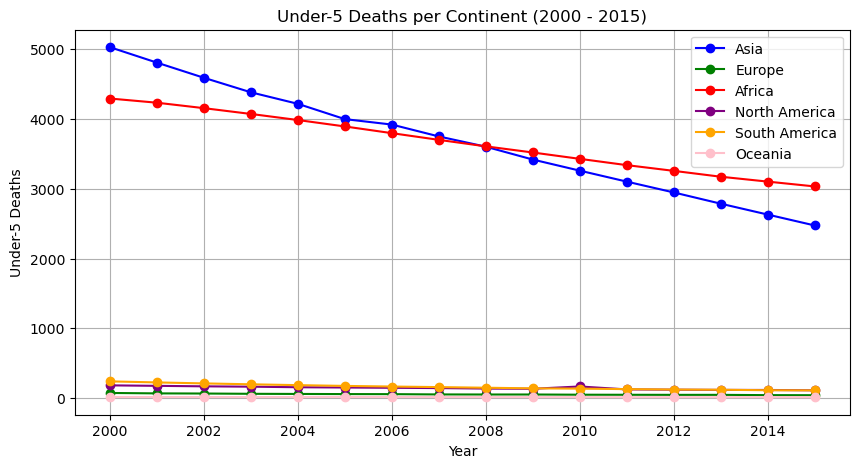

In [140]:
# Under-5 deaths per year by continent
# x-axis: year
# y-axis: under 5 deaths
# each continent will have its own line in the graph

fig, ax = plt.subplots(figsize=(10, 5))

colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink']

for i, continent in enumerate(continents):
    # for each continent, get the under five deaths for every year
    under_five_deaths_per_continent = [under_five_deaths_by_cont_year[continent][year] for year in years]

    # plot under five deaths for that continent
    ax.plot(years, under_five_deaths_per_continent, label=continent, color=colors[i], linestyle='-', marker='o')


ax.set_title('Under-5 Deaths per Continent (2000 - 2015)')
ax.set_xlabel('Year')
ax.set_ylabel('Under-5 Deaths')
ax.legend()
ax.grid(True)
plt.show()

### Median Percentage Expenditure Per Continent in 2014
The graph above reveals that most continents have a low under-five child mortality rate. This led us to investigate the relationship between health expenditure by continent, in connection with the patterns observed in the above visual.Our team chose to concentrate on the health expenditure data from 2014, as it was the most recent year with comprehensive information available.

We created a new dataframe, `df_2014`, containing all the data from the year 2014. However, we needed to remove 29 rows that had placeholder `0` values in the `percentage expenditure` column.

In [141]:
df_2014 = df_relevant.loc[ (df_relevant['Year'] == 2014)]

df_2014['percentage expenditure'].value_counts()

percentage expenditure
0.000000       29
45.337887       1
8.523486        1
1491.703605     1
1040.278436     1
               ..
941.756291      1
97.677946       1
2163.043414     1
789.276461      1
10.822595       1
Name: count, Length: 155, dtype: int64

In [142]:
# Finding and dropping all rows with percentage expenditure == 0

drop_index = df_2014.loc[df_2014['percentage expenditure'] == 0].index
df_2014 = df_2014.drop(drop_index)

df_2014

,Country,Year,Status,Hepatitis B,Polio,Diphtheria,under-five deaths,percentage expenditure,GDP,Schooling,Population,Life expectancy,continent
1,Afghanistan,2014,Developing,62.0,58.0,62.0,86,73.523582,612.696514,10.0,327582.0,59.9,Asia
17,Albania,2014,Developing,98.0,98.0,98.0,1,428.749067,4575.763787,14.2,288914.0,77.5,Europe
33,Algeria,2014,Developing,95.0,95.0,95.0,24,54.237318,547.851700,14.4,39113313.0,75.4,Africa
49,Angola,2014,Developing,64.0,68.0,64.0,101,23.965612,479.312240,11.4,2692466.0,51.7,Africa
65,Antigua and Barbuda,2014,Developing,99.0,96.0,99.0,0,2422.999774,12888.296670,13.9,NaN,76.2,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2811,Uruguay,2014,Developing,95.0,95.0,95.0,0,463.639782,16737.898270,15.5,3419546.0,76.8,South America
2827,Uzbekistan,2014,Developing,99.0,99.0,99.0,18,0.442802,25.448414,12.1,37577.0,69.2,Asia
2843,Vanuatu,2014,Developing,64.0,65.0,64.0,0,564.816704,3148.365130,10.8,25885.0,71.7,Oceania
2907,Zambia,2014,Developing,86.0,78.0,86.0,41,196.667577,1738.882200,12.5,1562974.0,61.1,Africa


In [143]:
# Finding percentage expenditure by continent
median_expenditure_per_continent_2014 = df_2014.groupby(by=['continent'])['percentage expenditure'].median()
median_expenditure_per_continent_2014 = median_expenditure_per_continent_2014.sort_values(ascending=False)

median_expenditure_per_continent_2014

continent
Europe           1144.661902
South America     704.570108
Oceania           564.816704
North America     473.123812
Asia              181.908378
Africa             59.487449
Name: percentage expenditure, dtype: float64

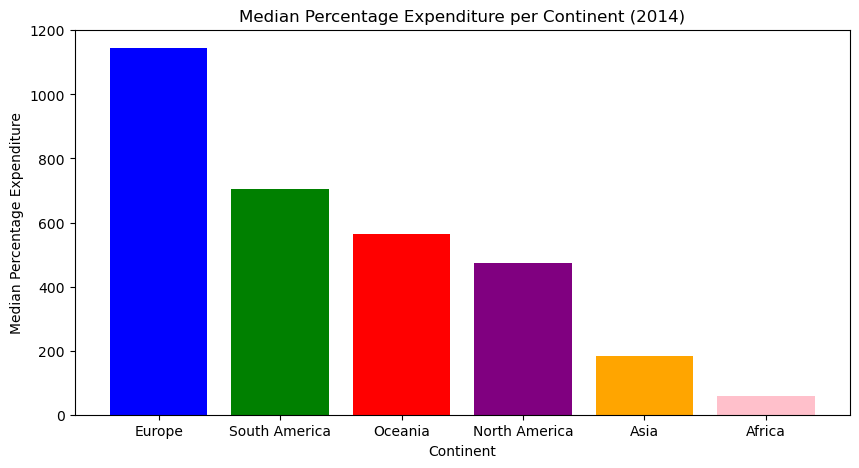

In [144]:
fig, ax = plt.subplots(figsize=(10, 5))

colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink']

continents = list(median_expenditure_per_continent_2014.keys())
expenditures = list((median_expenditure_per_continent_2014.values))

ax.bar(continents, expenditures, color = colors)


ax.set_title('Median Percentage Expenditure per Continent (2014)')
ax.set_xlabel('Continent')
ax.set_ylabel('Median Percentage Expenditure')


plt.show()

It looks like North America has the lowest percentage expenditure in health while still maintaining a very low mortality rate of children under five.

### Relationship of Vaccination Rates vs Under-Five Mortality Rate
We saw an interesting phenomenon from the first graph: Under-5 mortality rates in Asia and Africa crossed paths in 2008. This prompted us to explore the potential relationship between vaccination rates for diseases like Hepatitis B, Polio, and Diphtheria, and their impact on mortality rates in these two continents.

Our team opted to use the median as the measure of central tendency because the mean vaccination rates for each disease were significantly below the 50th percentile, indicating that the data for all three diseases was skewed lower and likely contained some outliers. Therefore, we believed the median would provide a more accurate representation of the central values.

In [145]:
# Find the median vaccination rate per country over time for different diseases

hepatitis_by_cont_year = df_relevant.groupby(by=["continent", "Year"])["Hepatitis B"].median()
polio_by_cont_year = df_relevant.groupby(by=["continent", "Year"])["Polio"].median()
diphtheria_by_cont_year = df_relevant.groupby(by=["continent", "Year"])["Diphtheria"].median()

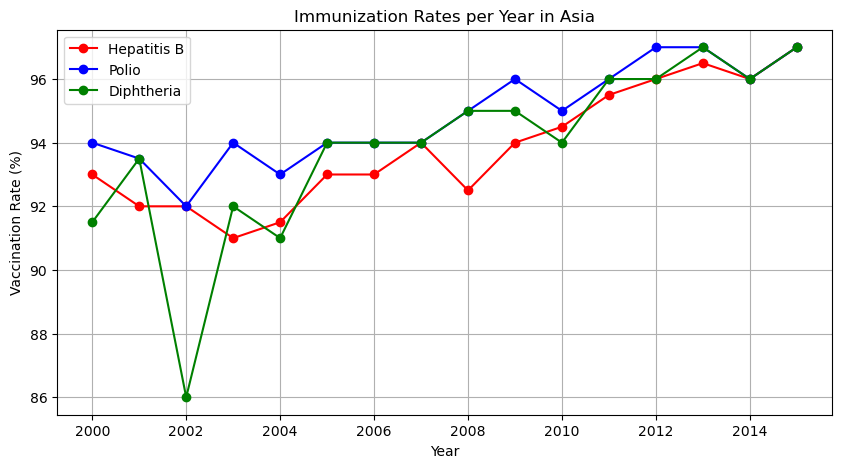

In [146]:
# Vacinnations per year In Asia
# x-axis: year
# y-axis: Vaccination Rates

fig, ax = plt.subplots(figsize=(10, 5))


# get the immunization rate for 2000 - 2015 for each disease in Asia
immunization_rate_per_cont_hep = [hepatitis_by_cont_year['Asia'][year] for year in years]
immunization_rate_per_cont_pol = [polio_by_cont_year['Asia'][year] for year in years]
immunization_rate_per_cont_dip = [diphtheria_by_cont_year['Asia'][year] for year in years]

# plot each vaccine immunization rate with different colors
ax.plot(years, immunization_rate_per_cont_hep, label='Hepatitis B', color='red', linestyle='-', marker='o')
ax.plot(years, immunization_rate_per_cont_pol, label='Polio', color='blue', linestyle='-', marker='o')
ax.plot(years, immunization_rate_per_cont_dip, label='Diphtheria', color='green', linestyle='-', marker='o')


ax.set_title('Immunization Rates per Year in Asia')
ax.set_xlabel('Year')
ax.set_ylabel('Vaccination Rate (%)')
ax.legend()
ax.grid(True)
plt.show()

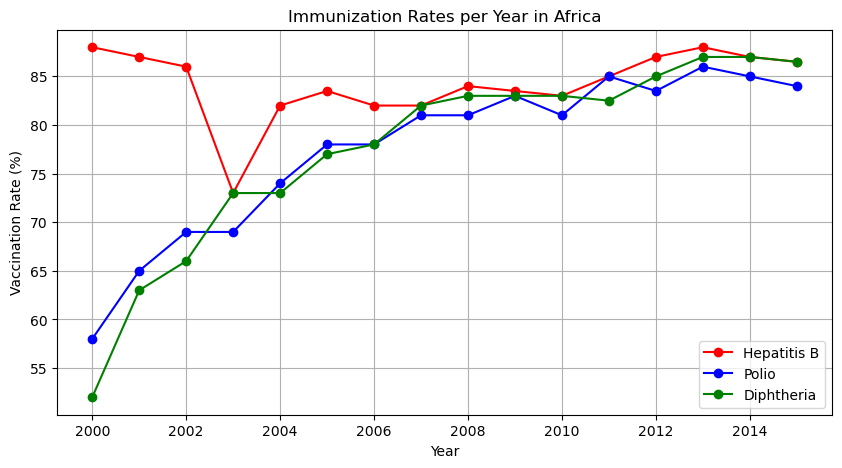

In [147]:
# Vacinnations per year In Africa
# x-axis: year
# y-axis: Vaccination Rates

fig, ax = plt.subplots(figsize=(10, 5))


# get the immunization rate for 2000 - 2015 for each disease in Africa
immunization_rate_per_cont_hep = [hepatitis_by_cont_year['Africa'][year] for year in years]
immunization_rate_per_cont_pol = [polio_by_cont_year['Africa'][year] for year in years]
immunization_rate_per_cont_dip = [diphtheria_by_cont_year['Africa'][year] for year in years]



# plot each vaccine immunization rate with different colors
ax.plot(years, immunization_rate_per_cont_hep, label='Hepatitis B', color='red', linestyle='-', marker='o')
ax.plot(years, immunization_rate_per_cont_pol, label='Polio', color='blue', linestyle='-', marker='o')
ax.plot(years, immunization_rate_per_cont_dip, label='Diphtheria', color='green', linestyle='-', marker='o')


ax.set_title('Immunization Rates per Year in Africa')
ax.set_xlabel('Year')
ax.set_ylabel('Vaccination Rate (%)')
ax.legend()
ax.grid(True)
plt.show()

Immunization rates in Africa have increased over time, whereas Asia's rates have remained relatively stable. Additionally, the correlation between immunization rates and the deaths of children under five is not as strong as we initially anticipated.

### Relationship between Schooling and Life Expectancy
Our team sought to examine factors beyond healthcare that might influence global life expectancy. This prompted us to explore the potential relationship between the years of schooling in a continent and the life expectancy of its population. We will create six different scatter plots for each continent and include a trend line to visualize the relationship.

Again we create a new dataframe `df_schooling` and drop the rows with null values in either the `Life expectancy` or `Schooling` columns.

In [148]:
# since there are only 10 null rows in life expectancy, we can drop these rows

df.loc[df["Life expectancy"].isna()]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
624,Cook Islands,2013,Developing,NaN,NaN,0,0.01,0.000000,98.0,0,...,98.0,3.58,98.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
769,Dominica,2013,Developing,NaN,NaN,0,0.01,11.419555,96.0,0,...,96.0,5.58,96.0,0.1,722.756650,NaN,2.7,2.6,0.721,12.7
1650,Marshall Islands,2013,Developing,NaN,NaN,0,0.01,871.878317,8.0,0,...,79.0,17.24,79.0,0.1,3617.752354,NaN,0.1,0.1,NaN,0.0
1715,Monaco,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,4.30,99.0,0.1,NaN,NaN,NaN,NaN,NaN,NaN
1812,Nauru,2013,Developing,NaN,NaN,0,0.01,15.606596,87.0,0,...,87.0,4.65,87.0,0.1,136.183210,NaN,0.1,0.1,NaN,9.6
1909,Niue,2013,Developing,NaN,NaN,0,0.01,0.000000,99.0,0,...,99.0,7.20,99.0,0.1,NaN,NaN,0.1,0.1,NaN,NaN
1958,Palau,2013,Developing,NaN,NaN,0,NaN,344.690631,99.0,0,...,99.0,9.27,99.0,0.1,1932.122370,292.0,0.1,0.1,0.779,14.2
2167,Saint Kitts and Nevis,2013,Developing,NaN,NaN,0,8.54,0.000000,97.0,0,...,96.0,6.14,96.0,0.1,NaN,NaN,3.7,3.6,0.749,13.4
2216,San Marino,2013,Developing,NaN,NaN,0,0.01,0.000000,69.0,0,...,69.0,6.50,69.0,0.1,NaN,NaN,NaN,NaN,NaN,15.1
2713,Tuvalu,2013,Developing,NaN,NaN,0,0.01,78.281203,9.0,0,...,9.0,16.61,9.0,0.1,3542.135890,1819.0,0.2,0.1,NaN,0.0


In [149]:
# there are approx. 10 countries that don't report schooling data, so we will drop these as well

df.loc[df["Schooling"].isna()]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
432,Côte d'Ivoire,2015,Developing,53.3,397.0,57,NaN,0.0,83.0,65,...,81.0,NaN,83.0,1.9,NaN,NaN,5.5,5.5,NaN,NaN
433,Côte d'Ivoire,2014,Developing,52.8,47.0,58,0.01,0.0,76.0,50,...,76.0,5.72,76.0,2.0,NaN,NaN,5.6,5.6,NaN,NaN
434,Côte d'Ivoire,2013,Developing,52.3,412.0,59,3.15,0.0,8.0,48,...,79.0,5.81,8.0,2.4,NaN,NaN,5.8,5.7,NaN,NaN
435,Côte d'Ivoire,2012,Developing,52.0,415.0,59,3.24,0.0,82.0,137,...,83.0,6.14,82.0,2.9,NaN,NaN,5.9,5.9,NaN,NaN
436,Côte d'Ivoire,2011,Developing,51.7,419.0,60,3.13,0.0,62.0,628,...,58.0,6.42,62.0,3.3,NaN,NaN,6.1,6.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2805,United States of America,2004,Developed,77.5,111.0,28,8.48,0.0,92.0,37,...,92.0,15.14,96.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2806,United States of America,2003,Developed,77.2,114.0,28,8.40,0.0,92.0,56,...,91.0,15.60,96.0,0.1,NaN,NaN,0.7,0.6,NaN,NaN
2807,United States of America,2002,Developed,77.0,115.0,28,8.33,0.0,88.0,41,...,9.0,14.55,94.0,0.1,NaN,NaN,0.8,0.6,NaN,NaN
2808,United States of America,2001,Developed,76.9,115.0,28,8.25,0.0,89.0,116,...,89.0,13.73,94.0,0.1,NaN,NaN,0.8,0.6,NaN,NaN


In [150]:
# Dropping null values for schooling and life expectancy data and creating new df

df_schooling = df_relevant.dropna(subset=["Schooling", "Life expectancy"])
df_schooling

,Country,Year,Status,Hepatitis B,Polio,Diphtheria,under-five deaths,percentage expenditure,GDP,Schooling,Population,Life expectancy,continent
0,Afghanistan,2015,Developing,65.0,6.0,65.0,83,71.279624,584.259210,10.1,33736494.0,65.0,Asia
1,Afghanistan,2014,Developing,62.0,58.0,62.0,86,73.523582,612.696514,10.0,327582.0,59.9,Asia
2,Afghanistan,2013,Developing,64.0,62.0,64.0,89,73.219243,631.744976,9.9,31731688.0,59.9,Asia
3,Afghanistan,2012,Developing,67.0,67.0,67.0,93,78.184215,669.959000,9.8,3696958.0,59.5,Asia
4,Afghanistan,2011,Developing,68.0,68.0,68.0,97,7.097109,63.537231,9.5,2978599.0,59.2,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,68.0,67.0,65.0,42,0.000000,454.366654,9.2,12777511.0,44.3,Africa
2934,Zimbabwe,2003,Developing,7.0,7.0,68.0,41,0.000000,453.351155,9.5,12633897.0,44.5,Africa
2935,Zimbabwe,2002,Developing,73.0,73.0,71.0,40,0.000000,57.348340,10.0,125525.0,44.8,Africa
2936,Zimbabwe,2001,Developing,76.0,76.0,75.0,39,0.000000,548.587312,9.8,12366165.0,45.3,Africa


In [151]:
df_schooling["Life expectancy"].sort_values()

1127    36.3
2312    39.0
2311    41.0
2309    41.5
2308    42.3
        ... 
241     89.0
1850    89.0
2513    89.0
2056    89.0
995     89.0
Name: Life expectancy, Length: 2768, dtype: float64

In [152]:
min_life_expectancy = df_schooling["Life expectancy"].min()
max_life_expectancy = df_schooling["Life expectancy"].max()

In [153]:
min_schooling = df_schooling["Schooling"].min()
max_schooling = df_schooling["Schooling"].max()

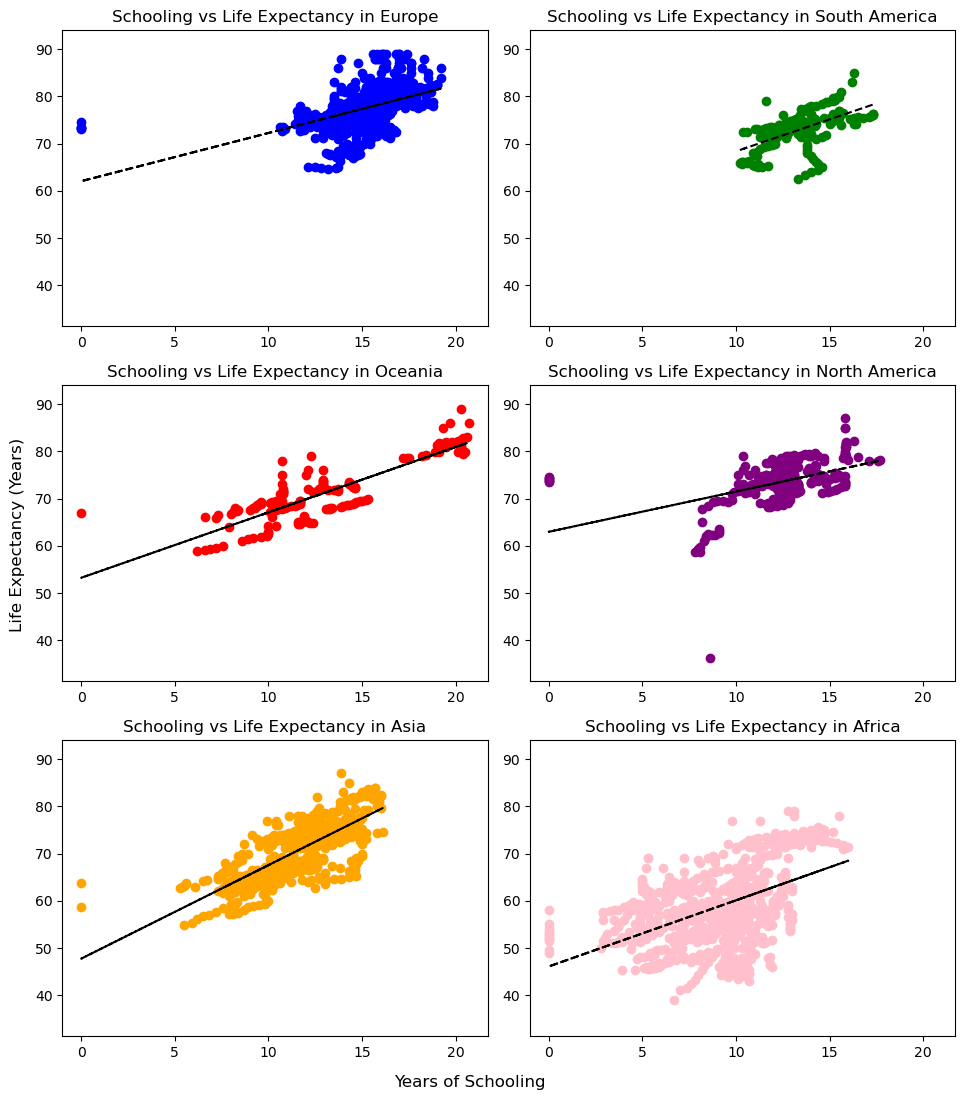

In [154]:
# Schooling vs life expectancy per continent
# x-axis: Years of Schooling
# y-axis: Life expectancy age

fig, axs = plt.subplots(3, 2, figsize=(10, 12))

colors = ['blue', 'green', 'red', 'purple', 'orange', 'pink']

# for-loop to loop through continents
for i, continent in enumerate(continents):

    # use the mod and // to indicate row and col in the axis
    # get schooling and life expectancy data for each continent
    
    x_axis = df_schooling.loc[df_schooling["continent"] == continent]["Schooling"]
    y_axis = df_schooling.loc[df_schooling["continent"] == continent]["Life expectancy"]

    axs[i//2, i%2].scatter(x_axis, y_axis, color= colors[i], marker="o")

    # creating line of best fit
    coeffs = np.polyfit(x_axis, y_axis, 1)
    trend_line = np.polyval(coeffs, x_axis)
    axs[i//2, i%2].plot(x_axis, trend_line, color="black", linestyle="--", label='Trend Line')


    axs[i//2, i%2].set_title('Schooling vs Life Expectancy in ' + continent)
    axs[i//2, i%2].set_xlim(min_schooling - 1, max_schooling + 1)
    axs[i//2, i%2].set_ylim(min_life_expectancy - 5, max_life_expectancy + 5)

fig.text(0.5, 0.04, 'Years of Schooling', ha='center', fontsize=12)
fig.text(0.04, 0.5, 'Life Expectancy (Years)', va='center', rotation='vertical', fontsize=12)
plt.tight_layout(rect=[0.05, 0.05, 1, 0.95])

plt.show();

There is a clear positive correlation between years of schooling and life expectancy across all continents. The longer children stay in school, the higher their life expectancy tends to be.

In [155]:
# Save cleaned dataset as CSV
df_relevant.to_csv('data/Life_expectancy_clean.csv', index=False)

## Conclusions

- Governments in Asia and Africa should increase healthcare subsidies, aiming to match North America's healthcare subsidization rate of 473% per capita. This increase could lead to a reduction in mortality rates of children under the age of five.
- Further research is needed to understand the sharp decline in Under-5 mortality rates in Asia. Insights from this research could inform policies that may be implemented in Africa to reduce child mortality rates. Potential causes for the decline in Asia might include: 
    - Higher immunization rates for common diseases
    - The effects of population density on child mortality
    - Cultural factors influencing health practices
- There is a clear positive correlation between years of schooling and life expectancy across all continents. Therefore, we recommend implementing policies that encourage keeping children in school for as long as possible. The longer children stay in school, the higher their life expectancy tends to be. Encourage longer school attendance to improve life expectancy, focusing on expanding access to quality education and incorporating health education into school curriculums.

## Next Steps
- Continue discussions with policymakers to explore options for increasing funding and resources dedicated to health services. 
- Investigate the factors behind the decrease in child mortality rates in Asia, including vaccination rates, population density, cultural influences, and education.
- Expand access to education by building more schools, especially in low-income countries, and increasing minimum education requirements. 
- Focus on improving access to quality education, as the strong correlation between education and health outcomes highlights its importance in enhancing overall well-being. 